In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns
import joblib
import matplotlib

from sklearn.impute import SimpleImputer, KNNImputer

# AllSubtypesPredicted.csv file that includes the RFS and OS is available on the supplementary Table S1 of our manuscript.

In [2]:
X = joblib.load('./AML_data/meth.pkl')
phenodf = joblib.load('./AML_data/pheno.pkl')
KMdata = pd.read_csv('./AML_data/AllSubtypesPredicted.csv') 

In [3]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X)
X = pd.DataFrame(imp.transform(X), columns = X.columns, index = X.index.get_level_values(1))

In [4]:
unionindices = joblib.load('./AML_data/unionindices.pkl')
len(unionindices)

1300

In [5]:
X.shape

(142, 406830)

In [6]:
mll = ['other 11q23/MLL', 't(9;11)', 't(10;11)','t(11;19)']
other = ['normal', 'mono 7', 'inv(16)','other clon abn', '3q21q26', 't(8;21)', 'sole+8', 't(15;17)']

In [7]:
# Create a new column for genotypes to merge some groups together

# Nas, No result and other will form one group

mll = ['other 11q23/MLL', 't(9;11)', 't(10;11)','t(11;19)']
other = ['normal', 'mono 7', 'inv(16)', '3q21q26', 't(8;21)', 'sole+8', 't(15;17)']
finalgenotype = []

for data in phenodf.genotype:
    if data in mll:
        finalgenotype.append('MLL rearranged')   
    elif data == 'no result':
        finalgenotype.append('Undefined')   
    elif data == 'other clon abn':
        finalgenotype.append('Undefined')  
    elif data in other:
        finalgenotype.append(data)    
    else:
        finalgenotype.append('Undefined')
        
phenodf['finalgenotype'] = finalgenotype
        

In [8]:
phenodf[['genotype', 'finalgenotype']].head(20)

,genotype,finalgenotype
public_id,,
AML_001,normal,normal
AML_002,t(11;19),MLL rearranged
AML_003,normal,normal
AML_004_r,NaN,Undefined
AML_005,mono 7,mono 7
AML_006,inv(16),inv(16)
AML_007,normal,normal
AML_008,normal,normal
AML_009,t(9;11),MLL rearranged


In [9]:
len(phenodf.finalgenotype.unique())

9

In [10]:
phenodf.finalgenotype.value_counts()

Undefined         43
normal            30
MLL rearranged    25
t(8;21)           19
inv(16)           12
mono 7             5
t(15;17)           4
sole+8             3
3q21q26            1
Name: finalgenotype, dtype: int64

In [11]:
phenodf.shape

(142, 5)

In [12]:
phenodf = phenodf[~phenodf.finalgenotype.isin(['Undefined'])]
phenodf.shape

(99, 5)

In [13]:
X = X[X.index.isin(phenodf.index)]
X.shape

(99, 406830)

In [14]:
phenodf[(phenodf.finalgenotype.isin(['inv(16)', 't(8;21)', 'MLL rearranged']))]

,sample.type,FAB,genotype,relapse,finalgenotype
public_id,,,,,
AML_002,diagnostic,M5,t(11;19),True,MLL rearranged
AML_006,diagnostic,M4,inv(16),False,inv(16)
AML_009,diagnostic,M5,t(9;11),False,MLL rearranged
AML_012,diagnostic,M5,other 11q23/MLL,False,MLL rearranged
AML_014,diagnostic,M5,t(10;11),True,MLL rearranged
AML_004,diagnostic,M5,t(11;19),True,MLL rearranged
AML_015,diagnostic,M5,other 11q23/MLL,True,MLL rearranged
AML_017,diagnostic,M5,t(9;11),False,MLL rearranged
AML_020,diagnostic,M5,other 11q23/MLL,False,MLL rearranged


### Extract only the t(8;21) diagnostic samples that have experienced relapse (True) or not (False)

In [15]:
pheno3sub = phenodf[(phenodf.finalgenotype.isin(['t(8;21)'])) & (phenodf.relapse.isin([True, False]))]
pheno3sub

,sample.type,FAB,genotype,relapse,finalgenotype
public_id,,,,,
AML_029,diagnostic,M2,t(8;21),True,t(8;21)
AML_036,diagnostic,M2,t(8;21),False,t(8;21)
AML_040,diagnostic,M2,t(8;21),False,t(8;21)
AML_053,diagnostic,M2,t(8;21),False,t(8;21)
AML_056,diagnostic,M2,t(8;21),True,t(8;21)
AML_058,diagnostic,M2,t(8;21),True,t(8;21)
AML_066,diagnostic,M2,t(8;21),True,t(8;21)
AML_072,diagnostic,M2,t(8;21),True,t(8;21)
AML_073,diagnostic,M2,t(8;21),True,t(8;21)


In [16]:
pheno3sub.relapse.value_counts()

True     12
False     6
Name: relapse, dtype: int64

In [17]:
meth3sub = X[X.index.isin(pheno3sub.index)]

In [18]:
meth3sub.shape

(18, 406830)

# Create Heatmaps based on the 50 top most significant CpGs that separate the patients who relapsed from those who did not


## Hierachical Clustering with Scipy

In [19]:
import scipy.cluster.hierarchy as sch

In [20]:
# Run mann whitney test to check cpgs that are significantly differential methylated among relapses and debuts

In [21]:
from scipy.stats import mannwhitneyu

from statsmodels.stats.multitest import multipletests

In [22]:
def dmsOneVsRest(data, indices, classes, phenodata, subtype):
    pvals = []
    for index in indices:
       
        data1 = data[index][data.index.isin(phenodata[subtype == classes].index)]
        data2 = data[index][~data.index.isin(phenodata[subtype == classes].index)]
#         print('CpG site: {}'.format(index))
#         print('-----------------------------------')
#         print(mannwhitneyu(data1,data2))
#         print('-----------------------------------')
#         print('-----------------------------------')

        stat, pvalue = mannwhitneyu(data1,data2)
        
        pvals.append([index, classes, pvalue])
    return pvals
        

In [23]:
stats_all = []
for c in pheno3sub['relapse'].unique():
    print('\033[1m' + '{} vs REST'.format(c) + '\033[0m')
    print('-----------------------------------')
    data = dmsOneVsRest(meth3sub, unionindices, c, pheno3sub, pheno3sub['relapse'])
    statistics = pd.DataFrame(data, columns = ['CpG_id', 'diagnosis','p-value'])
    statistics['Adjusted p-value'] = multipletests(statistics['p-value'], method = 'fdr_bh')[1]
    
    statistics = statistics[statistics['p-value']<0.05]

    print(statistics.nsmallest(50, 'p-value'))
    stats_all.append(statistics.nsmallest(50, 'p-value').values)
    
    
    print('-----------------------------------')

True vs REST
-----------------------------------
          CpG_id  diagnosis   p-value  Adjusted p-value
589   cg12864721       True  0.000842          0.382166
21    cg00411072       True  0.001572          0.382166
890   cg19108881       True  0.002141          0.382166
388   cg08541649       True  0.002864          0.382166
807   cg17242351       True  0.003289          0.382166
880   cg18847227       True  0.003801          0.382166
911   cg19659642       True  0.004348          0.382166
73    cg01517680       True  0.005003          0.382166
134   cg02872426       True  0.005003          0.382166
593   cg13023870       True  0.005003          0.382166
527   cg11639950       True  0.006510          0.382166
106   cg02391713       True  0.006533          0.382166
313   cg06719042       True  0.006533          0.382166
695   cg14687145       True  0.008435          0.382166
484   cg10622644       True  0.008463          0.382166
548   cg12092090       True  0.008463          0.382166

In [24]:
stats_all

[array([['cg12864721', True, 0.0008424196279289881, 0.3821655155947084],
        ['cg00411072', True, 0.0015720085142544526, 0.3821655155947084],
        ['cg19108881', True, 0.0021411150038004824, 0.3821655155947084],
        ['cg08541649', True, 0.00286426881042987, 0.3821655155947084],
        ['cg17242351', True, 0.003288843507513804, 0.3821655155947084],
        ['cg18847227', True, 0.0038008207376100853, 0.3821655155947084],
        ['cg19659642', True, 0.004347811795512556, 0.3821655155947084],
        ['cg01517680', True, 0.0050031577634589725, 0.3821655155947084],
        ['cg02872426', True, 0.0050031577634589725, 0.3821655155947084],
        ['cg13023870', True, 0.0050031577634589725, 0.3821655155947084],
        ['cg11639950', True, 0.006509775265101187, 0.3821655155947084],
        ['cg02391713', True, 0.006533236415264363, 0.3821655155947084],
        ['cg06719042', True, 0.006533236415264363, 0.3821655155947084],
        ['cg14687145', True, 0.008435039055962162, 0.38216

In [25]:
finaldata = pd.DataFrame(stats_all[0], columns = ['CpG_id', 'Relapse','p-value', 'Adjusted p-value'])
finaldata

,CpG_id,Relapse,p-value,Adjusted p-value
0,cg12864721,True,0.00084242,0.382166
1,cg00411072,True,0.00157201,0.382166
2,cg19108881,True,0.00214112,0.382166
3,cg08541649,True,0.00286427,0.382166
4,cg17242351,True,0.00328884,0.382166
5,cg18847227,True,0.00380082,0.382166
6,cg19659642,True,0.00434781,0.382166
7,cg01517680,True,0.00500316,0.382166
8,cg02872426,True,0.00500316,0.382166
9,cg13023870,True,0.00500316,0.382166


In [26]:
finaldata.shape

(50, 4)

In [27]:
CPGS_filter = np.unique(finaldata['CpG_id'].to_list())
len(CPGS_filter)

50

In [28]:
#joblib.dump(CPGS_filter, 't821.pkl')

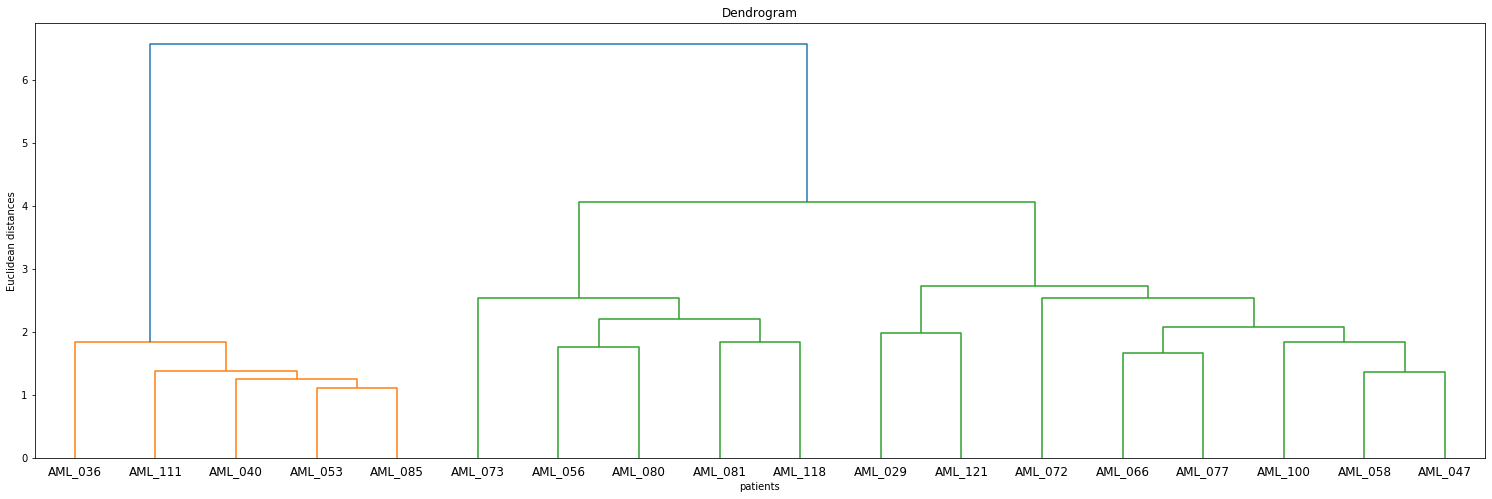

In [29]:
# Cluster by samples

linkage = sch.linkage(meth3sub[CPGS_filter], method = 'ward')

plt.figure(figsize = (26,8))
dendroSamples = sch.dendrogram(linkage, labels = meth3sub[CPGS_filter].index)
plt.title('Dendrogram')
plt.xlabel('patients')
plt.ylabel('Euclidean distances')
plt.show()

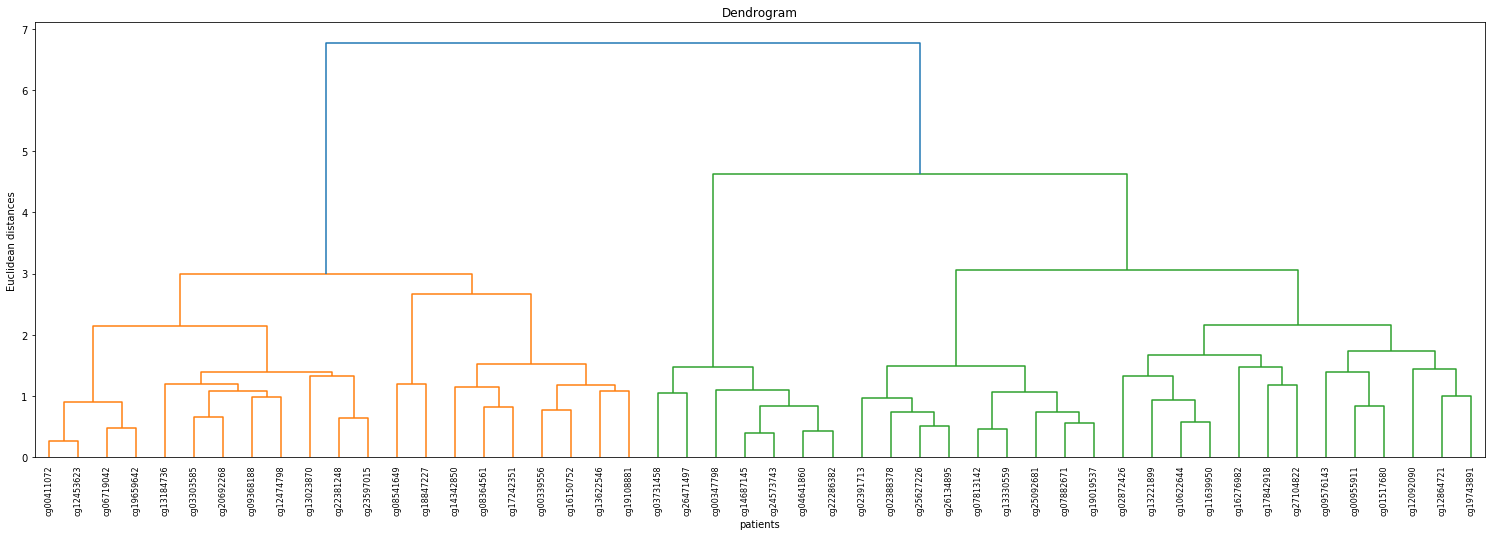

In [30]:
# Cluster by CpG
CPGlinkage = sch.linkage(meth3sub[CPGS_filter].T, method = 'ward')

plt.figure(figsize = (26,8))
dendroCPG = sch.dendrogram(CPGlinkage, labels =meth3sub[CPGS_filter].T.index)
plt.title('Dendrogram')
plt.xlabel('patients')
plt.ylabel('Euclidean distances')
plt.show()
orderedCPG = dendroCPG['ivl']

In [31]:
# get sample ids ordered as shown in the dendrogram
newindices = dendroSamples['ivl']
orderedCPG = dendroCPG['ivl']

In [32]:
#joblib.dump(CPGlinkage, 'linkaget821.pkl')

In [33]:
def AnnotHeatMap(widths, 
         heights, 
         ncols, 
         nrows, 
         dendrolabels,
         dendrolabels2,
         linkage,
         linkage2,
         biodatalist, 
         cmaplist, 
         biolabels, 
         data, 
         cbarllist,
         datalabel,
         x_ticks,
         title,
         figname,
         figsize = (20,8),
         shrink = 1,
         aspect = 5,
         save = False
         ):
   
   

    fig = plt.figure(constrained_layout=True, figsize = (figsize))
    widths = widths
    heights = heights
    spec = fig.add_gridspec(ncols=ncols, nrows=nrows, width_ratios=widths,
                              height_ratios=heights)
    
    #add dendogram for samples
    ax0 = fig.add_subplot(spec[0,1])
    
    den = sch.dendrogram(linkage, labels = dendrolabels)
    ax0.set_xticks([])
    ax0.set_yticks([])
    #ax0.set_ylabel('Euclidean distances')
    
    
    # For biological data
    for row, d, cmap, l, cbar in zip(range(1, nrows-1), biodatalist, cmaplist, biolabels, cbarllist):
        #print(cbar)
         
        ax = fig.add_subplot(spec[row, 1])
        cmapN = plt.get_cmap(cmap, len(cbar))
        sns.heatmap(d, cmap = cmapN , ax = ax, cbar_kws={'label': l, 'shrink':shrink, 'aspect':aspect})
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel(l)

        colorbar = ax.collections[0].colorbar 
        colorbar.set_label(label=l,size=15)
        
        r = colorbar.vmax - colorbar.vmin 
        colorbar.set_ticks([colorbar.vmin + r / len(cbar) * (0.5 + i) for i in range(len(cbar))])
        colorbar.set_ticklabels(cbar) 

    # Plot the DATAFRAME

    ax1 = fig.add_subplot(spec[nrows-1,ncols-1])
    sns.heatmap(data.T, cmap = 'RdBu_r', ax = ax1, cbar_kws={'label': datalabel})
    
    colorbar2 = ax1.collections[0].colorbar 
        
    colorbar2.set_label(label=datalabel,size=15)
    #ax1.set_xticks(np.arange(data.shape[0]))
    ax1.set_xticklabels(x_ticks, rotation = 45)
    
    
    ax1.set_xlabel('Patients', fontsize = 30)
    #ax1.set_yticklabels(data.columns.to_list(), rotation = 45)
    ax1.set_yticks([])
    #ax1.set_ylabel('CpG sites', fontsize = 16)
    
    
    #add dendogram for cpg sites
    ax2 = fig.add_subplot(spec[nrows-1,0])
    
    den2 = sch.dendrogram(linkage2, labels = dendrolabels2, orientation='left')
    ax2.set_yticks([])
    ax2.set_ylabel('CpG sites Clustering', fontsize = 30)
    
    
    #plt.suptitle(title, fontsize = 20)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.rcParams['svg.fonttype'] = 'none'
    if save == True:
        plt.savefig(figname)

    plt.show()

In [34]:
# Change patient samples order based on clustering

Xfinal2 = meth3sub[CPGS_filter].copy()
Xfinal3 = Xfinal2.reindex(newindices)


In [35]:
# Change the phenotype column accordingly

phenodf2 = pheno3sub.copy()
phenodf2 = phenodf2.reindex(newindices)


In [36]:
phenodf2

,sample.type,FAB,genotype,relapse,finalgenotype
public_id,,,,,
AML_036,diagnostic,M2,t(8;21),False,t(8;21)
AML_111,diagnostic,M1,t(8;21),False,t(8;21)
AML_040,diagnostic,M2,t(8;21),False,t(8;21)
AML_053,diagnostic,M2,t(8;21),False,t(8;21)
AML_085,diagnostic,M0,t(8;21),False,t(8;21)
AML_073,diagnostic,M2,t(8;21),True,t(8;21)
AML_056,diagnostic,M2,t(8;21),True,t(8;21)
AML_080,diagnostic,M2,t(8;21),True,t(8;21)
AML_081,diagnostic,M2,t(8;21),True,t(8;21)


In [37]:
# 1 relapse vs no relapse
    
followup =  phenodf2['relapse'].astype('category').cat.codes
followdict = {}
for g, c in zip(phenodf2['relapse'].astype('category'),  phenodf2['relapse'].astype('category').cat.codes):
    followdict[str(g)] = c
sortedfollow= dict(sorted(followdict.items(), key=lambda item: item[1]))

# 2 subtype

subtypes = phenodf2.finalgenotype.astype('category').cat.codes
genodict = {}
for g, c in zip(phenodf2.finalgenotype.astype('category'),  phenodf2.finalgenotype.astype('category').cat.codes):
    genodict[str(g)] = c
sortedgeno = dict(sorted(genodict.items(), key=lambda item: item[1]))
sortedgeno

# 3 FAB

FAB =  phenodf2.FAB.astype('category').cat.codes
fabdict = {}
for g, c in zip(phenodf2.FAB.astype('category'),  phenodf2.FAB.astype('category').cat.codes):
    fabdict[str(g)] = c
sortedfab = dict(sorted(fabdict.items(), key=lambda item: item[1]))
sortedfab

    #Convert the data to 3-d arrays for data visualization with seaborn
followup = np.tile(followup, (3,1))
subtypes = np.tile(subtypes, (3,1))
FAB = np.tile(FAB, (3,1))


featurelist = [subtypes, FAB, followup]


cbarlabels = [list(sortedgeno.keys()), list(sortedfab.keys()), list(sortedfollow.keys())] 



# The subtype list is reversed in the color bars so  they go as:
1. 3q21q6 - r
2. MLL - coral
3. Undefined -light gray
4. inversion 16 - jade (#00A86B)
5. mono 7 - Dark olive green (#556B2F)
6. normal - Lemon chiffon (#FFFACD)
7. sole + 8 - jazzberry jam (#A50B5E)
8. t(15;17) - lavender magenta (#EE82EE)
9. t(8;21) - brandeis blue (#0070FF)

In [38]:
print(sortedfab.keys())

dict_keys(['M0', 'M1', 'M2', 'M4'])


In [39]:
sub_colors = ['#0070FF']
cmapsub = matplotlib.colors.ListedColormap(sub_colors)

fab_colors = ['r', 'coral',  '#00A86B',  '#FFFACD']
fabrelapse = matplotlib.colors. ListedColormap(fab_colors)


relapse_colors = ['#3CB371', '#800000']
cmaprelapse = matplotlib.colors.ListedColormap(relapse_colors)

cbartitle = 'DNA Methylation'

cmaplist = [cmapsub, fabrelapse, cmaprelapse]
labels = ['Subtype', 'FAB', 'Relapse']

title = 'Most important CpG sites for FMCA data prediction'

In [40]:
phenodf2.relapse.value_counts()

True     12
False     6
Name: relapse, dtype: int64

C:\Users\olgkr928\Anaconda3\envs\env_KM\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\olgkr928\Anaconda3\envs\env_KM\lib\site-packages\ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\olgkr928\Anaconda3\envs\env_KM\lib\site-packages\ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cur

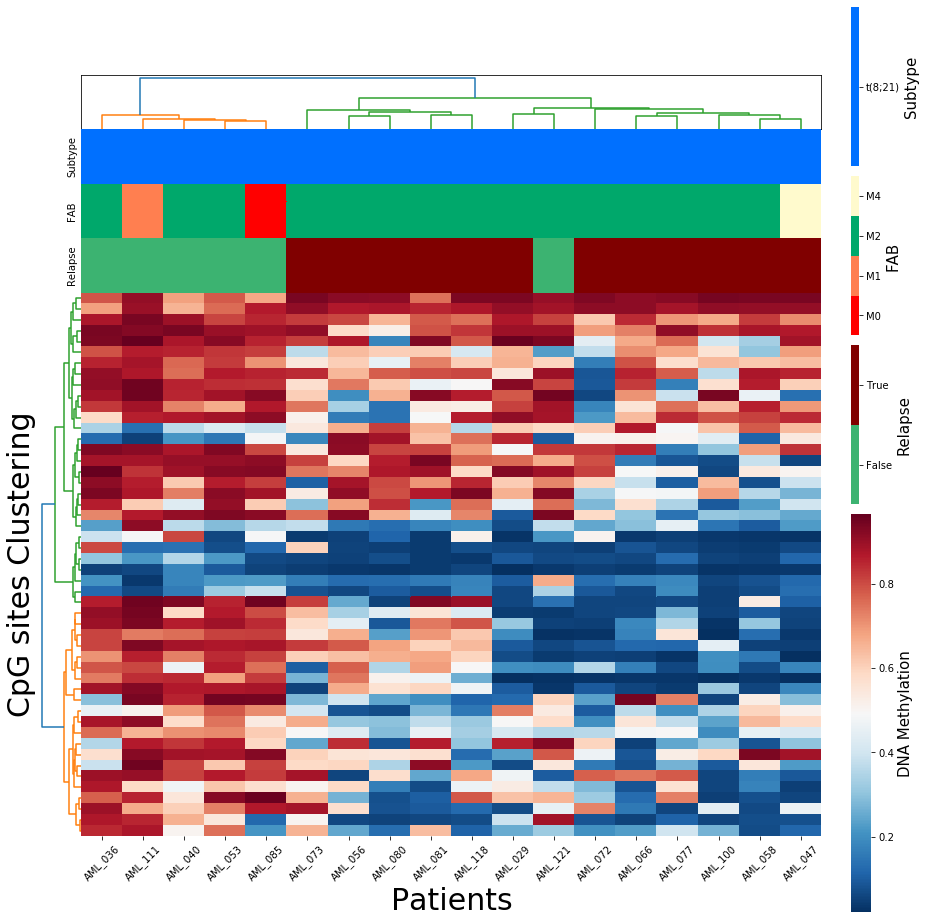

In [41]:
data = Xfinal3[orderedCPG] # use the ordered 641 cpg sites from hierachical clustering
AnnotHeatMap(widths = [1, 18], heights = [1,1,1,1, 10], ncols = 2, nrows = 5, linkage = linkage, linkage2 = CPGlinkage, 
             dendrolabels = data.index, dendrolabels2 = data.columns.to_list(),
             biodatalist=featurelist, 
             cmaplist = cmaplist, biolabels=labels, data = data, cbarllist=cbarlabels,datalabel=cbartitle,
             x_ticks =  data.index.to_list(),title=None,
             figname = 'HeatMapt821me+me-.png',
             figsize = (14,14),shrink = 4,aspect = 20,save = False)

We observe two patterns of low and high methylation. In this part information will be extracted from the clusters to create the low and high methylation groups

In [42]:
len(dendroSamples['color_list'])

17

In [43]:
len(dendroSamples['ivl'])

18

In [44]:
from collections import defaultdict

In [45]:
cluster_idxs = defaultdict(list)
for c, pi in zip(dendroSamples['color_list'], dendroSamples['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_idxs[c].append(int(i))

cluster_idxs

defaultdict(list,
            {'C1': [3, 4, 2, 1, 0],
             'C2': [6, 7, 8, 9, 5, 10, 11, 13, 14, 16, 17, 15, 12]})

In [46]:
cluster_classes = {}
for c, l in cluster_idxs.items():
    i_l = [dendroSamples['ivl'][i] for i in l]
    cluster_classes[c] = i_l

cluster_classes

{'C1': ['AML_053', 'AML_085', 'AML_040', 'AML_111', 'AML_036'],
 'C2': ['AML_056',
  'AML_080',
  'AML_081',
  'AML_118',
  'AML_073',
  'AML_029',
  'AML_121',
  'AML_066',
  'AML_077',
  'AML_058',
  'AML_047',
  'AML_100',
  'AML_072']}

In [47]:
meplus = cluster_classes['C1']
meminus = cluster_classes['C2']


In [48]:
Medata = []
for mp in meplus:
    Medata.append(['High', mp])
    
for mm in meminus:
     Medata.append(['Low', mm])
        

In [49]:
Medata

[['High', 'AML_053'],
 ['High', 'AML_085'],
 ['High', 'AML_040'],
 ['High', 'AML_111'],
 ['High', 'AML_036'],
 ['Low', 'AML_056'],
 ['Low', 'AML_080'],
 ['Low', 'AML_081'],
 ['Low', 'AML_118'],
 ['Low', 'AML_073'],
 ['Low', 'AML_029'],
 ['Low', 'AML_121'],
 ['Low', 'AML_066'],
 ['Low', 'AML_077'],
 ['Low', 'AML_058'],
 ['Low', 'AML_047'],
 ['Low', 'AML_100'],
 ['Low', 'AML_072']]

In [50]:
meth = pd.DataFrame(Medata, columns = ['group', 'id'])

In [51]:
meth

,group,id
0,High,AML_053
1,High,AML_085
2,High,AML_040
3,High,AML_111
4,High,AML_036
5,Low,AML_056
6,Low,AML_080
7,Low,AML_081
8,Low,AML_118
9,Low,AML_073


In [52]:
pheno3sub['id'] = pheno3sub.index

C:\Users\olgkr928\Anaconda3\envs\env_KM\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
finaldf = pheno3sub.merge(meth, how = 'inner', on = 'id')
finaldf.index = finaldf.id
finaldf.rename(columns = {'id': 'public_id'}, inplace = True)

In [54]:
finaldf

,sample.type,FAB,genotype,relapse,finalgenotype,public_id,group
id,,,,,,,
AML_029,diagnostic,M2,t(8;21),True,t(8;21),AML_029,Low
AML_036,diagnostic,M2,t(8;21),False,t(8;21),AML_036,High
AML_040,diagnostic,M2,t(8;21),False,t(8;21),AML_040,High
AML_053,diagnostic,M2,t(8;21),False,t(8;21),AML_053,High
AML_056,diagnostic,M2,t(8;21),True,t(8;21),AML_056,Low
AML_058,diagnostic,M2,t(8;21),True,t(8;21),AML_058,Low
AML_066,diagnostic,M2,t(8;21),True,t(8;21),AML_066,Low
AML_072,diagnostic,M2,t(8;21),True,t(8;21),AML_072,Low
AML_073,diagnostic,M2,t(8;21),True,t(8;21),AML_073,Low


#### Create New clusters and Use the High Low Meth groups as annotated bars

In [55]:
phe = finaldf.copy()
phe = phe.reindex(newindices)

In [56]:
# 1 relapse vs no relapse
    
followup =  phe['relapse'].astype('category').cat.codes
followdict = {}
for g, c in zip(phe['relapse'].astype('category'),  phe['relapse'].astype('category').cat.codes):
    followdict[str(g)] = c
sortedfollow= dict(sorted(followdict.items(), key=lambda item: item[1]))

# 2 Low or high methylation

group =  phe.group.astype('category').cat.codes
groupdict = {}
for g, c in zip(phe.group.astype('category'),  phe.group.astype('category').cat.codes):
    groupdict[str(g)] = c
sortedgroup = dict(sorted(groupdict.items(), key=lambda item: item[1]))
sortedgroup

    #Convert the data to 3-d arrays for data visualization with seaborn
followup = np.tile(followup, (3,1))
group = np.tile(group, (3,1))



featurelist = [group, followup]


cbarlabels = [list(sortedgroup.keys()), list(sortedfollow.keys())] 



In [57]:
phe.group.unique()

array(['High', 'Low'], dtype=object)

In [58]:
groupcolors  = ['r', 'b']
cmapgroup = matplotlib.colors.ListedColormap(groupcolors)

relapse_colors = ['#3CB371', '#800000']
cmaprelapse = matplotlib.colors.ListedColormap(relapse_colors)

cbartitle = 'DNA Methylation'

cmaplist = [cmapgroup, cmaprelapse]
labels = ['Methylation', 'Relapse']

title = 'Most important CpG sites for FMCA data prediction'

C:\Users\olgkr928\Anaconda3\envs\env_KM\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\olgkr928\Anaconda3\envs\env_KM\lib\site-packages\ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\olgkr928\Anaconda3\envs\env_KM\lib\site-packages\ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cur

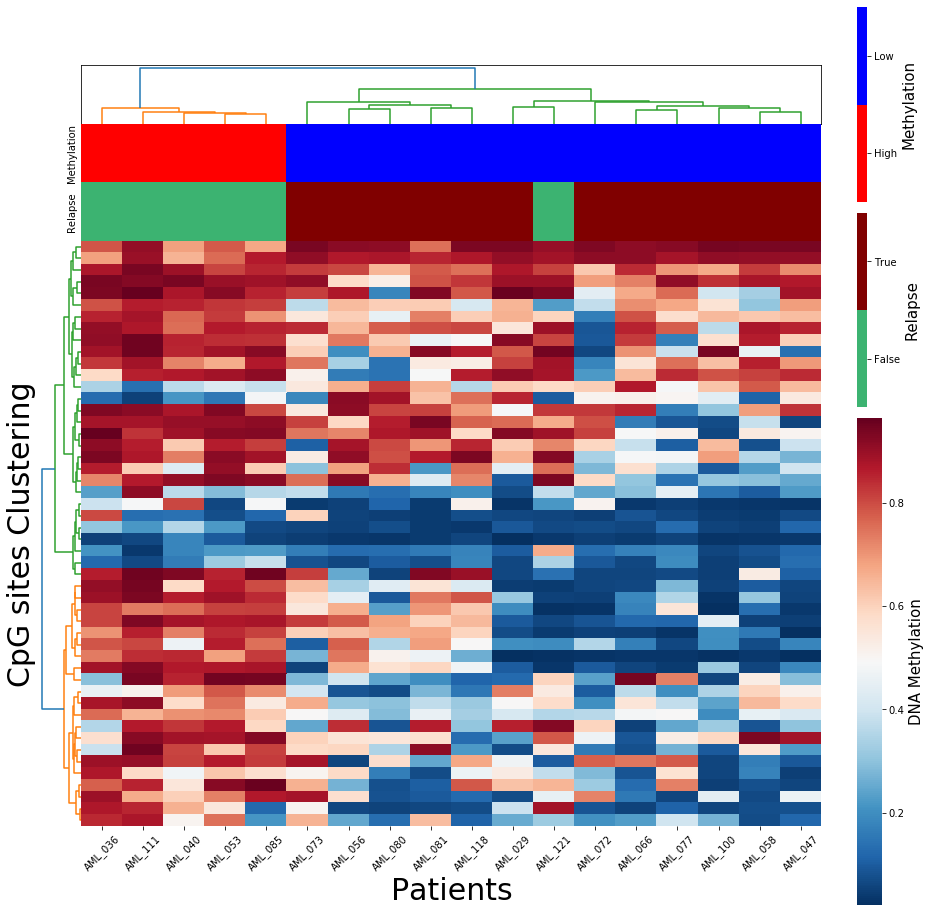

In [59]:

data = Xfinal3[orderedCPG] # use the ordered 641 cpg sites from hierachical clustering
AnnotHeatMap(widths = [1, 18], heights = [1,1,1, 10], ncols = 2, nrows = 4, linkage = linkage, linkage2 = CPGlinkage, 
             dendrolabels = data.index, dendrolabels2 = data.columns.to_list(),
             biodatalist=featurelist, 
             cmaplist = cmaplist, biolabels=labels, data = data, cbarllist=cbarlabels,datalabel=cbartitle,
             x_ticks =  data.index.to_list(),title=None,
             figname = 'HeatMapt821me+me-.svg',
             figsize = (14,14),shrink = 4,aspect = 20,save = False)

# Extract data from the Relapse Free Survival and Overall survival

In [60]:
KMdata

,public_id,Outcome,Relapse,RFS,Dead,OS,FAB,Original.Subtype,Subtype,Predicted.Subtype,Class.probability,Dataset
0,AML_110,CCR-Therapy off,0,208.0,0,208,M4,inv(16)/CBFB-MYH11,inv(16)/CBFB-MYH11,inv(16)/CBFB-MYH11,0.999930,Train
1,AML_051,CR-2/3 -Therapy off,1,12.0,0,210,M4,inv(16)/CBFB-MYH11,inv(16)/CBFB-MYH11,inv(16)/CBFB-MYH11,0.999930,Train
2,AML_100,Death after relapse(s),1,8.0,1,18,M2,t(8;21)/RUNX1-RUNX1T1,t(8;21)/RUNX1-RUNX1T1,t(8;21)/RUNX1-RUNX1T1,0.999953,Train
3,AML_015,Death after relapse(s),1,28.0,1,38,M5,other 11q23/MLL,MLL rearranged,MLL rearranged,0.999958,Train
4,AML_123,CCR-Therapy off,0,155.0,0,155,M4,inv(16)/CBFB-MYH11,inv(16)/CBFB-MYH11,inv(16)/CBFB-MYH11,0.999932,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
137,AML_107,CCR-Therapy off,0,201.0,0,201,data missing,no result,Undefined,normal,0.999964,Extra undefined
138,AML_001_r,Death after relapse(s),1,7.0,1,12,M2,NaN,Undefined,normal,0.914731,Extra undefined
139,AML_114_r,Death after relapse(s),1,11.0,1,13,M4,NaN,Undefined,MLL rearranged,0.981258,Extra undefined
140,AML_043_r,Death after relapse(s),1,10.0,1,12,M2,NaN,Undefined,normal,0.999963,Extra undefined


# Merge the phenotypes with the KM data to get the two columns

In [61]:
finaldf

,sample.type,FAB,genotype,relapse,finalgenotype,public_id,group
id,,,,,,,
AML_029,diagnostic,M2,t(8;21),True,t(8;21),AML_029,Low
AML_036,diagnostic,M2,t(8;21),False,t(8;21),AML_036,High
AML_040,diagnostic,M2,t(8;21),False,t(8;21),AML_040,High
AML_053,diagnostic,M2,t(8;21),False,t(8;21),AML_053,High
AML_056,diagnostic,M2,t(8;21),True,t(8;21),AML_056,Low
AML_058,diagnostic,M2,t(8;21),True,t(8;21),AML_058,Low
AML_066,diagnostic,M2,t(8;21),True,t(8;21),AML_066,Low
AML_072,diagnostic,M2,t(8;21),True,t(8;21),AML_072,Low
AML_073,diagnostic,M2,t(8;21),True,t(8;21),AML_073,Low


In [62]:

finaldf = finaldf.merge(KMdata[['RFS', 'OS', 'Dead', 'public_id']], how = 'inner', on = 'public_id')
finaldf.set_index('public_id', inplace = True)

In [63]:
finaldf

,sample.type,FAB,genotype,relapse,finalgenotype,group,RFS,OS,Dead
public_id,,,,,,,,,
AML_029,diagnostic,M2,t(8;21),True,t(8;21),Low,7.0,12,1
AML_036,diagnostic,M2,t(8;21),False,t(8;21),High,185.0,185,0
AML_040,diagnostic,M2,t(8;21),False,t(8;21),High,156.0,156,0
AML_053,diagnostic,M2,t(8;21),False,t(8;21),High,150.0,150,0
AML_056,diagnostic,M2,t(8;21),True,t(8;21),Low,16.0,32,1
AML_058,diagnostic,M2,t(8;21),True,t(8;21),Low,13.0,18,1
AML_066,diagnostic,M2,t(8;21),True,t(8;21),Low,13.0,144,0
AML_072,diagnostic,M2,t(8;21),True,t(8;21),Low,10.0,138,0
AML_073,diagnostic,M2,t(8;21),True,t(8;21),Low,36.0,145,0


In [64]:
finaldf['RFS'] = finaldf.RFS.astype(int)
finaldf

,sample.type,FAB,genotype,relapse,finalgenotype,group,RFS,OS,Dead
public_id,,,,,,,,,
AML_029,diagnostic,M2,t(8;21),True,t(8;21),Low,7,12,1
AML_036,diagnostic,M2,t(8;21),False,t(8;21),High,185,185,0
AML_040,diagnostic,M2,t(8;21),False,t(8;21),High,156,156,0
AML_053,diagnostic,M2,t(8;21),False,t(8;21),High,150,150,0
AML_056,diagnostic,M2,t(8;21),True,t(8;21),Low,16,32,1
AML_058,diagnostic,M2,t(8;21),True,t(8;21),Low,13,18,1
AML_066,diagnostic,M2,t(8;21),True,t(8;21),Low,13,144,0
AML_072,diagnostic,M2,t(8;21),True,t(8;21),Low,10,138,0
AML_073,diagnostic,M2,t(8;21),True,t(8;21),Low,36,145,0


In [65]:
finaldf[['group', 'Dead', 'relapse', 'RFS', 'OS']]

,group,Dead,relapse,RFS,OS
public_id,,,,,
AML_029,Low,1,True,7,12
AML_036,High,0,False,185,185
AML_040,High,0,False,156,156
AML_053,High,0,False,150,150
AML_056,Low,1,True,16,32
AML_058,Low,1,True,13,18
AML_066,Low,0,True,13,144
AML_072,Low,0,True,10,138
AML_073,Low,0,True,36,145


In [66]:
import kaplanmeier as km

# Plot Relapse Free Survival 
Event = Relapse

small differences might appear in the p-values because for the purpose of this demonstration EFS and OS were rounded so no decimal appears

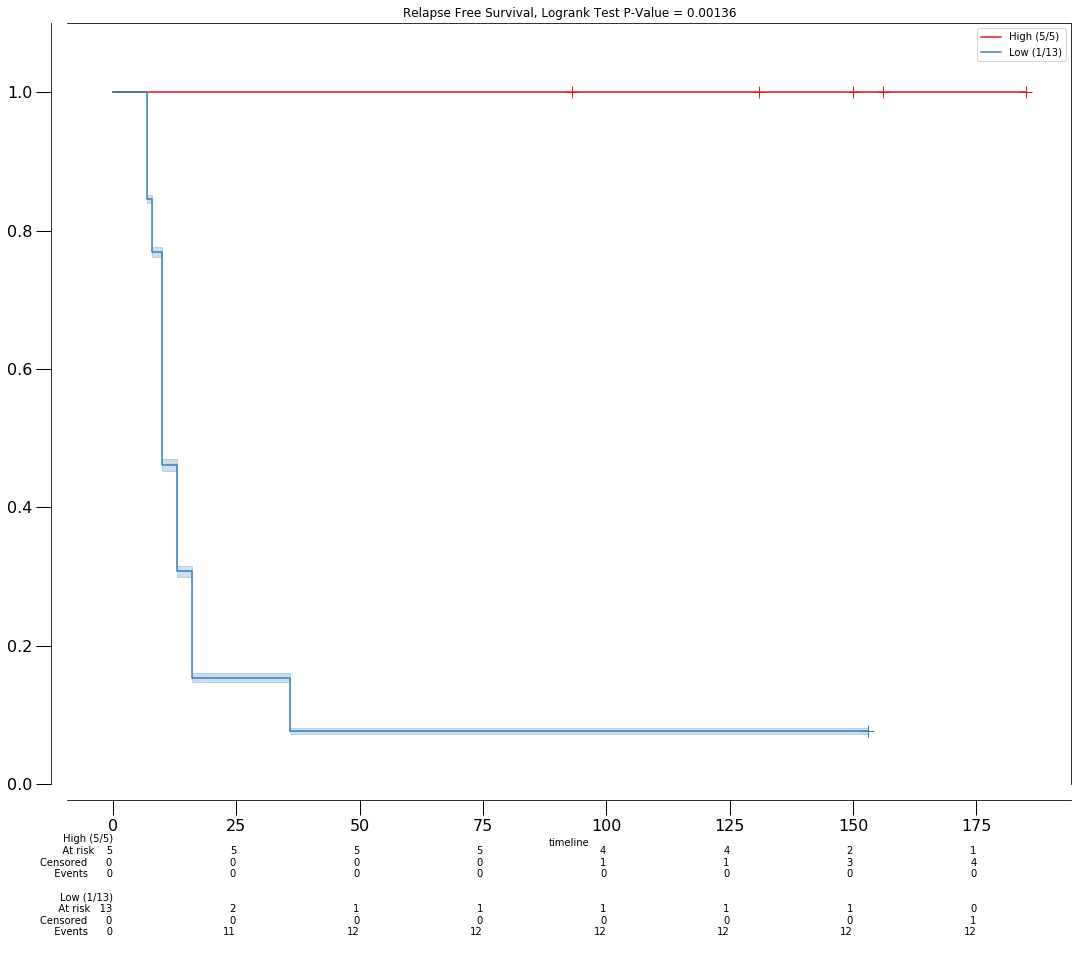

In [67]:
time_event=finaldf['RFS']
censoring=finaldf['relapse'] 
labx=finaldf['group']
# Compute survival
out=km.fit(time_event, censoring, labx)

km.plot(out, width=18, height=14, fontsize = 16, title = 'Relapse Free Survival')
plt.ylim(0,1.1)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig(imagepath + 't821me-me+KMcurveEFS.png')
#plt.savefig(imagepath + 'extras/t821me-me+KMcurveEFS.svg', format = 'svg')

# Plot Overall Survival 
Event = Death

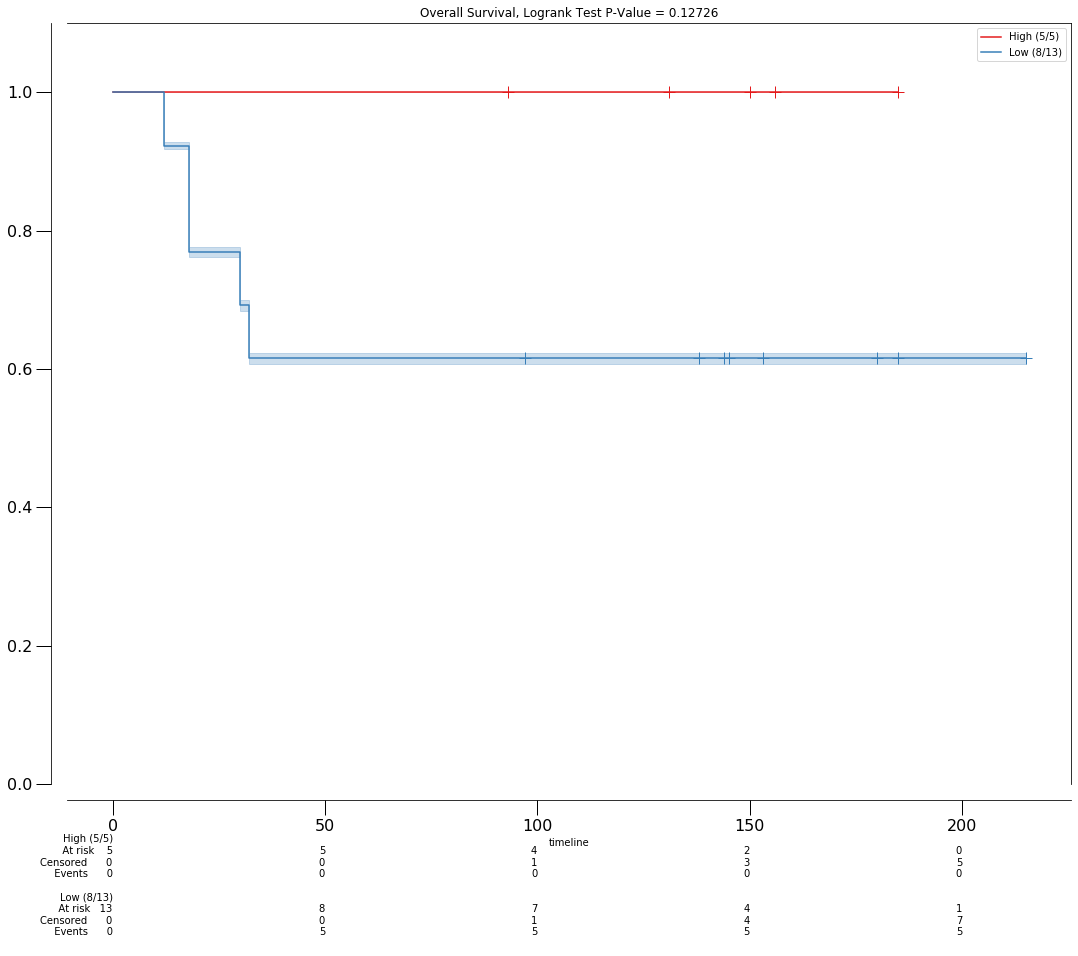

In [68]:
time_event=finaldf['OS']
censoring=finaldf['Dead'] 
labx=finaldf['group']
# Compute survival
out=km.fit(time_event, censoring, labx)

km.plot(out, width=18, height=14, fontsize = 16, title = 'Overall Survival')
plt.ylim(0,1.1)
plt.rcParams['svg.fonttype'] = 'none'
# plt.savefig(imagepath + 't821me-me+KMcurveOS.png')
# plt.savefig(imagepath + 'extras/t821me-me+KMcurveOS.svg', format = 'svg')

# Check mean methylation among the two patient groups (High & Low Methylation Groups)

In [69]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [70]:
meanmeth = pd.DataFrame(meth3sub[CPGS_filter].mean(axis=1).values, columns = ['mean methylation'], index = meth3sub.index)
meanmeth['group'] = finaldf.group.values

In [71]:
#meanmeth = meanmeth.sort_values('group')

Text(0.5, 0, 'Methylation Group')

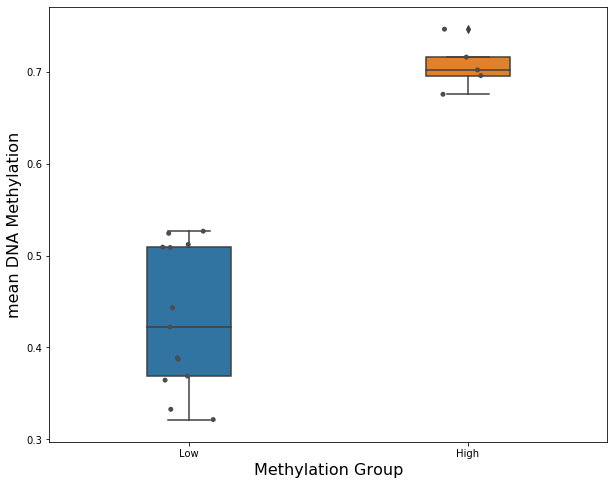

In [72]:
plt.figure(figsize= (10,8))
sns.boxplot(x = 'group', y = 'mean methylation', data = meanmeth, width = 0.3)
sns.stripplot(x = 'group', y = 'mean methylation', data = meanmeth, color=".3")
plt.ylabel('mean DNA Methylation', fontsize = 16)
plt.xlabel('Methylation Group', fontsize = 16)
#plt.savefig('BoxplotT821me-me+SNS.png', dpi = 300)

In [73]:
meanrelapseM = meanmeth['mean methylation'][meanmeth.group == 'Low'].values
meanrelapseP = meanmeth['mean methylation'][meanmeth.group == 'High'].values

In [74]:
stats, pval = mannwhitneyu(meanrelapseM, meanrelapseP)

In [75]:
meanrelapseM

array([0.44316003, 0.50914   , 0.3689    , 0.38878003, 0.33276   ,
       0.5265    , 0.38713998, 0.42223996, 0.52419   , 0.32161   ,
       0.36450002, 0.50874   , 0.51208   ], dtype=float32)

In [76]:
meanrelapseP

array([0.7019 , 0.67542, 0.71584, 0.69568, 0.74622], dtype=float32)

In [77]:
pval

0.0008043354283411249

In [78]:
multipletests(pval, method = 'fdr_bh')[1]

array([0.00080434])